# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

### Solution:

I chose $L^{(2)}$ as a metric, as it is the correct metric to express distances in an euclidean 2D space (the space of problems such as the TS problem). Given the added complexity of the square root operation, I decided to optimize the computation of distances by saving them in a $N \times N$ matrix, which I will refer to from now on as the *distance matrix*.

I used the 1D representation to encode the path (with the 1st point always fixed in the 1st position of the array).

I used 3 genetic-mutation operators:

1. **Random swap**: chooses 2 points at random in the array (bar the first one) and swaps them;

2. **Random shift**: selects a portion of the array of random length in a random position and shifts it forward a random number of steps. If one or more points were to shift over the end of the array they loop back to the beginning (starting from the second position). The first point is always fixed;

3. **Random permutation**: selects two portions of the array of the same (random) length, both in random position, and swaps them;

4. I also wrote a **Random inversion** operator: selects a portion of the array of random length in a random position and turns it backwards (the first point becomes the last, the second becomes the second to last, and so on); in the end I didn't use this operator because I implemented an optimization algorithm (discussed later) that essentially does the same operation, but not randomly.

Each of these mutations has a 10% chance of happening (therefore the chance of any mutation happening is $1 - 0.9^3 \approx 1 - 0.73 = 27\%$).

To create my selection operator, I assign a score to each path (the shorter the path the larger the score). The scores are then normalized so that their sum is 1, and the selection operator chooses a path with a probability that is given by this normalized score. To assign the score, any decreasing function would suffice, and the easiest choice is probably $x^{-1}$. I chose $x^{-4}$ to make the slope a little bit sharper and increase the probability of good paths being selected.

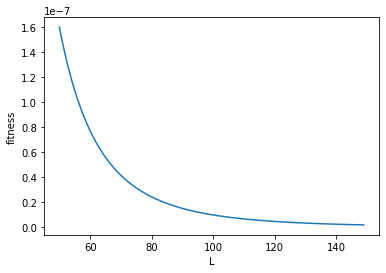

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

L = 50+np.arange(100)
def fitness(x):
    return np.power(1/x,4)
plt.plot(L, fitness(L))
plt.xlabel('L')
plt.ylabel('fitness')
plt.show()

Before introducing my crossover operator, I want to briefly introduce a small optimization technique, which I will call from now on *untangling*: the salesman, in the pursuit of the shortest route, can never cross its own path, as it would mean there is at least another, shorter, route. Let's consider, as an example, two possible paths connecting the following 4 points:

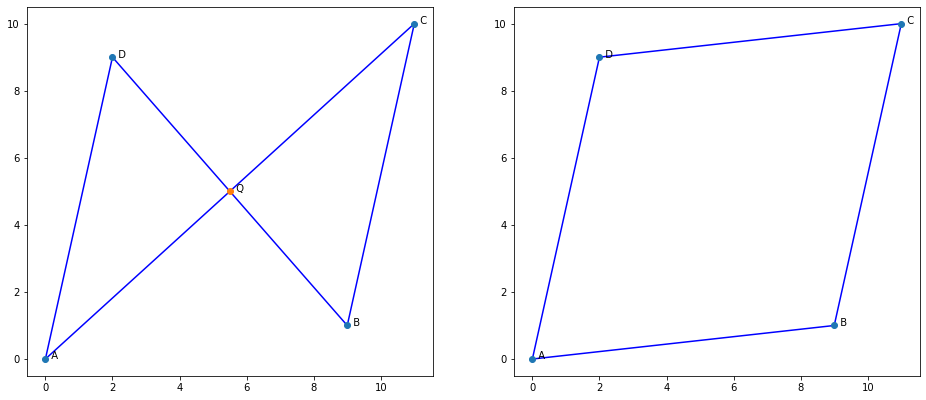

In [2]:
example = pd.DataFrame([['A',0,0], ['C',11,10], ['B',9,1], ['D',2,9]], columns=['#','x','y'])
example2 = example.copy()
example2.iloc[1], example2.iloc[2] = example.iloc[2].copy(), example.iloc[1].copy()

L, L2 = 0, 0
for i in range(example.shape[0]):
    L = L + np.sqrt( (example['x'].iloc[i-1] - example['x'].iloc[i])**2 
                    + (example['y'].iloc[i-1] - example['y'].iloc[i])**2 )
    L2 = L2 + np.sqrt( (example2['x'].iloc[i-1] - example2['x'].iloc[i])**2 
                      + (example2['y'].iloc[i-1] - example2['y'].iloc[i])**2 )

fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].scatter(example['x'], example['y'])
for name, x, y in zip(example['#'], example['x'], example['y']):
    axs[0].annotate('  %s' % name, xy=(x,y), textcoords='data')
    
axs[0].scatter(869/158, 8690/1738)
axs[0].annotate('  %s' % 'Q', xy=(869/158,8690/1738), textcoords='data')
    
axs[1].scatter(example2['x'], example2['y'])
for name, x, y in zip(example2['#'], example2['x'], example2['y']):
    axs[1].annotate('  %s' % name, xy=(x,y), textcoords='data')
    
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

for i in range(example.shape[0]):
    axs[0].plot([example['x'].iloc[i-1], example['x'].iloc[i]], 
                [example['y'].iloc[i-1], example['y'].iloc[i]], color='blue', zorder=0)
    axs[1].plot([example2['x'].iloc[i-1], example2['x'].iloc[i]], 
                [example2['y'].iloc[i-1], example2['y'].iloc[i]], color='blue', zorder=0)

plt.show()

The first path crosses over itslef in $Q$, while the second path doesn't. Which path is the shortest? 

The contribution of the segments $AD$ and $BC$ are the same, so they don't matter. The segment $AC$ can be broken down in $AQ$ + $QC$, and so can $BD$ in $BQ$ + $QD$. Due to triangle inequality, $AB$ **has** to be shorter than $AQ$ + $QB$, and similarly $CD$ has to be shorter than $CQ$ + $QD$. So the path with no self-crossing is the shortest.

In [3]:
print('Self-crossing path:\t', L, '\nNo self-crossing:\t', L2)

Self-crossing path:	 43.93530347463893 
No self-crossing:	 36.54985919086061


This reasoning can be generalized to any arbitrary path that crosses itself: we can model a self-crossing the same way we modeled the previous example, by replacing the $AD$ and $BC$ segments with the two halves of the complete path: we can remove the self-crossing, and make the path a little bit shorter, by just connecting $A$ with $B$ (instead of $C$) and $C$ with $D$, and by travelling along the $BC$ section of the path the opposite way.

We can remove all self-crossings by iterating this process. I wrote a function, called *untangler*, that does this job: first the function selects a random starting point; then it checks, in order, every possible pair of non-adjacent connections to see if they are tangled, and if they are, it untangles them; the loop goes on until the array is completely untagled.

This procedure is computationally cheap (it is an algorithm of $O(n^2)$ complexity, much better than the $O(n!)$ complexity of the TSP) and, while unable on its own to find the optimal solution, it can turn mediocre paths into good paths.

The untangler effectively reduces the space of all possible solutions to a subspace of "untangled" solutions. The hard part is now to find a way to move inside this subspace, and avoid wasting resources on mutations that will be immediately undone by the untangler.

To do so I implemented a small correction to the proposed crossover operator: the first part of the path is still given by the cities of the first parent, but to fill the second part of the path the algorithm scans through all the cities of the second parent **until** it finds a connection that does not cross the existing path; if it can't find such a city, it just reverts back to the original procedure and selects the first available city. This process repeats until the array is completely filled. Then, if there is still some self-crossing, the untangler is called.

I tested this algorithm on two maps of 34 cities each: the first map is composed of cities located in random positions along a circumference of radius 1; the second map is composed of cities located in random positions inside of a square of side 2.

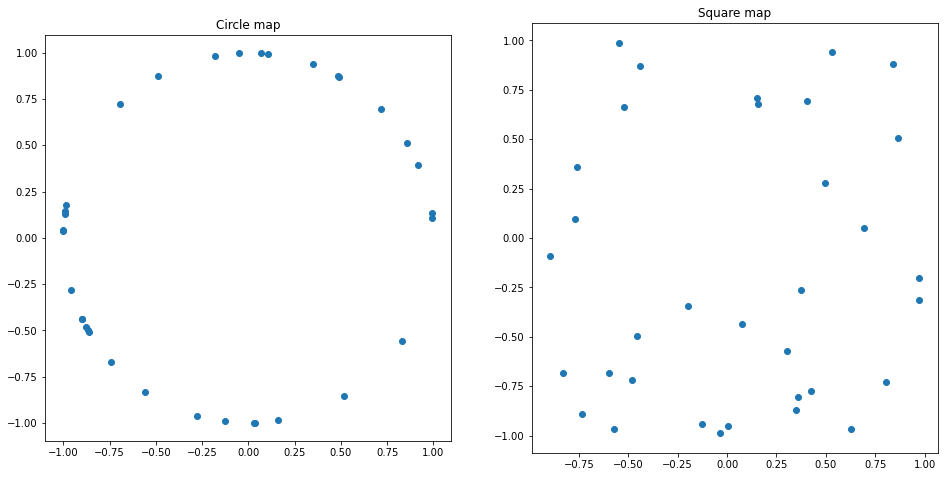

In [4]:
map_circle = pd.read_csv('map_circle.dat', delimiter='\t', header=None, names=['x', 'y'])
map_square = pd.read_csv('map_square.dat', delimiter='\t', header=None, names=['x', 'y'])

fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].scatter(map_circle['x'], map_circle['y'])
axs[1].scatter(map_square['x'], map_square['y'])
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')
axs[0].set_title('Circle map')
axs[1].set_title('Square map')
plt.show()

The cicle map features only one untangled solution, which must also be the shortest one (as shown earlier). So the untangler should be able to do the job on its own. I will use this map as a "test" for my algorithm.

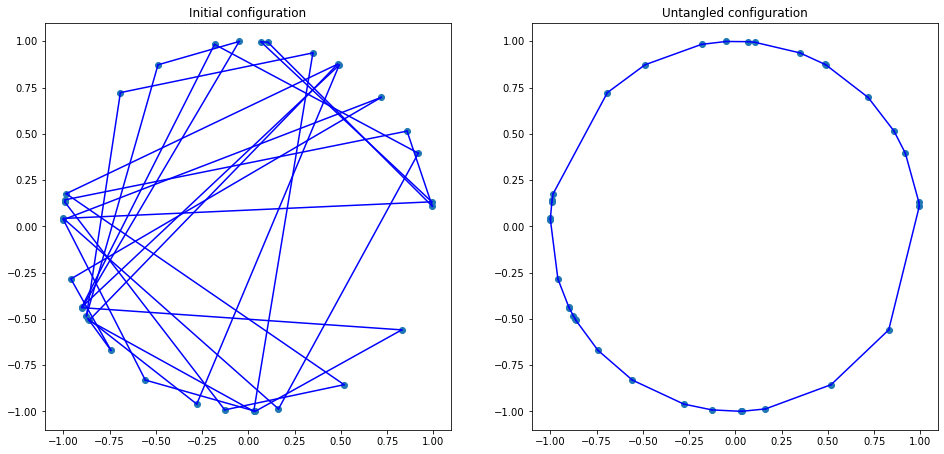

Initial configuration length: 42.398652136335315 
Untangled configuration length: 6.243056012436953


In [5]:
test_circle = pd.read_csv('output_test.dat', delimiter='\t', header=None)
circle_start = test_circle.loc[0, :].values-1
circle_best = test_circle.loc[1, :].values-1

x = map_circle['x'].values
y = map_circle['y'].values

fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].scatter(map_circle['x'], map_circle['y'])
axs[1].scatter(map_circle['x'], map_circle['y'])
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

for i, point in enumerate(circle_start):
    axs[0].plot([x[point], x[circle_start[i-1]]], [y[point], y[circle_start[i-1]]], color='blue')

for i, point in enumerate(circle_best):
    axs[1].plot([x[point], x[circle_best[i-1]]], [y[point], y[circle_best[i-1]]], color='blue')

axs[0].set_title('Initial configuration')
axs[1].set_title('Untangled configuration')
plt.show()

L_start, L_best = 0, 0
for i, point in enumerate(circle_start):
    L_start = L_start + np.sqrt( (x[point] - x[circle_start[i-1]])**2 + (y[point] - y[circle_start[i-1]])**2 )
for i, point in enumerate(circle_best):
    L_best = L_best + np.sqrt( (x[point] - x[circle_best[i-1]])**2 + (y[point] - y[circle_best[i-1]])**2 )

print('Initial configuration length:', L_start, '\nUntangled configuration length:', L_best)

As expected, the untangler alone is capable to find the optimal solution for the circle map.

For the square map, I used the full genetic algorithm. I first created an initial population of 100 random paths and untangled them. For each generation, I first use the selection operator to create 50 "couples" of paths (the selection operator does not remove selected paths from the bunch, a good path can be selected multiple times) and then I apply my crossover operator to the couple (with a 60% probability to activate), creating two new paths (if the operator does not activate, the new paths are just copies of the parents).

I then apply the 4 mutation operators (each with a 10% probability to activate) to each new path, and untangle any eventual tangled path. The result of this process is the new population. I repeated this process for 300 generations.

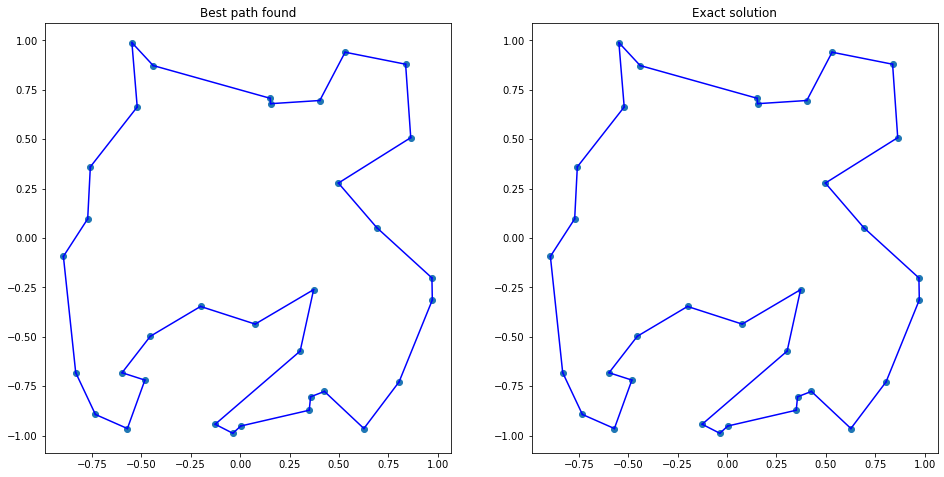

Best path length: 9.536788040898015 
Exact path length: 9.536788040898015


In [6]:
last_gen_square = pd.read_csv('verbose_output_square.dat', delimiter='\t', header=None)
square_best = last_gen_square.loc[0, :].values-1

bruteforce_square = pd.read_csv('output_bruteforce.dat', delimiter='\t', header=None)
square_exact = bruteforce_square.loc[:, 0].values-1

x = map_square['x'].values
y = map_square['y'].values

fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].scatter(map_square['x'], map_square['y'])
axs[1].scatter(map_square['x'], map_square['y'])
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

for i, point in enumerate(square_best):
    axs[0].plot([x[point], x[square_best[i-1]]], [y[point], y[square_best[i-1]]], color='blue')

for i, point in enumerate(square_exact):
    axs[1].plot([x[point], x[square_exact[i-1]]], [y[point], y[square_exact[i-1]]], color='blue')

axs[0].set_title('Best path found')
axs[1].set_title('Exact solution')
plt.show()

L_best, L_exact = 0, 0
for i, point in enumerate(square_best):
    L_best = L_best + np.sqrt( (x[point] - x[square_best[i-1]])**2 + (y[point] - y[square_best[i-1]])**2 )
for i, point in enumerate(square_exact):
    L_exact = L_exact + np.sqrt( (x[point] - x[square_exact[i-1]])**2 + (y[point] - y[square_exact[i-1]])**2 )

print('Best path length:', L_best, '\nExact path length:', L_exact)

I compared the best solution found by my algorithm with the exact solution for the same set of cities, computed using the Dantzig-Fulkerson-Johnson algorithm implemented in [this Julia package](https://github.com/ericphanson/TravelingSalesmanExact.jl).

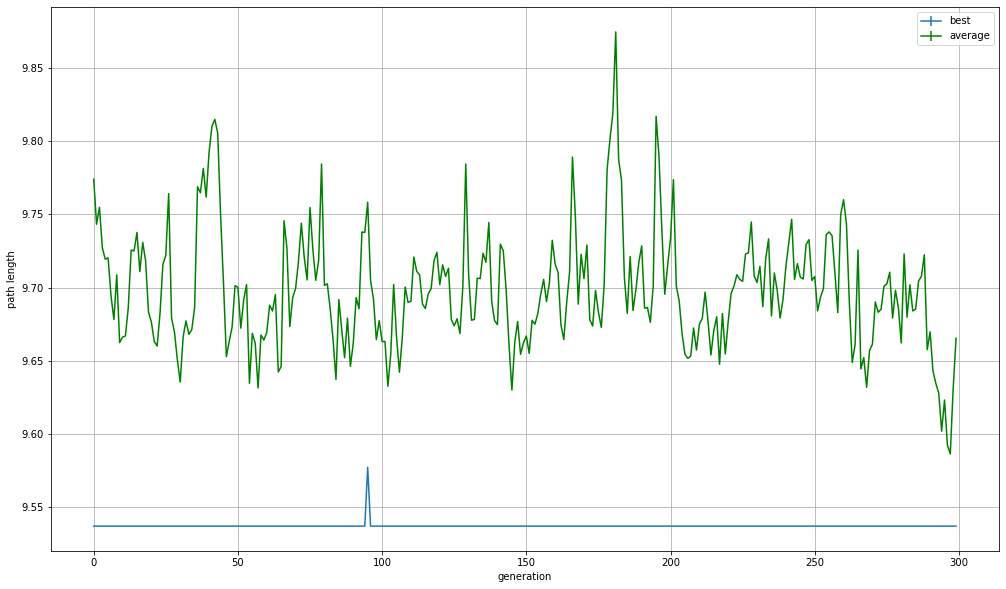

In [7]:
df = pd.read_csv('output_square.dat', delimiter='\t', header=None, names=['Generation', 'Check', 'L', 'AvgL', 'fit', 'trash'])

#print(df)
N=len(df['Generation'])
x = np.arange(N)      # [0,1,2,...,N-1]
    
plt.figure(figsize=(17,10))
plt.errorbar(x, df['L'], yerr=0, alpha=1.0, label='best')
plt.errorbar(x, df['AvgL'], yerr=0, color='green', alpha=1.0, label='average')
plt.xlabel('generation')
plt.ylabel('path length')
plt.grid(True)
plt.legend()
plt.show()

We would like to have some diversity in the population, to sample a portion as large as possible of the space of possible solutions. While the best solution is always present (except for 1 generation), the average path length (averaged on the top half) fluctuates decently (the y scale may be misleading here, as untangled solutions tend to be not much longer than the best solution) and never gets too close to the shortest path. This means we never have a condition where all the paths in the top half of the population are the same. Moreso, the fact that the best solution at time disappears from the population shows the effectiveness of the mutation operators in preventing stagnation.